# Logistic Regression Based Landslide Predictor
By : Alvin Dzaki Pratama Darmawan

## A. Data Preparation

### 1. library importing

In [392]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.datasets import make_classification
import joblib

### 2. Data Set Importing

In [116]:
dataSet = pd.read_csv(r"DataClean.csv", sep=";")

In [118]:
x = dataSet[['vibration','inclination','humidity','precipitation']]
y = dataSet['output']

In [120]:
xTrain, xTest, yTrain, yTest = train_test_split(x , y, train_size=0.8, random_state = 10)

In [122]:
xTrain , xTest

(     vibration  inclination  humidity  precipitation
 379      160.0        34.00      0.17         0.0000
 99       150.5        60.08      0.58         0.0000
 52       316.3        30.15      0.41         0.0000
 245       18.9        36.52      0.78         0.0000
 383      160.0        55.00      0.62         0.0000
 ..         ...          ...       ...            ...
 369      160.0        55.00      0.62         0.0000
 320      224.4        34.83      0.55         2.5500
 15       185.8        48.73      0.66         0.0255
 125      120.1        56.52      0.58         0.0000
 265        1.6        32.57      0.76         0.0000
 
 [340 rows x 4 columns],
      vibration  inclination  humidity  precipitation
 402      160.0        34.00      0.06           0.00
 322      234.5        34.00      0.38           2.55
 47       370.3        55.00      0.62           0.00
 423     1656.2        54.04      0.60           0.00
 191       63.6        32.53      0.75           0.00
 

In [124]:
yTrain , yTest

(379    1
 99     0
 52     0
 245    0
 383    1
       ..
 369    1
 320    1
 15     0
 125    0
 265    0
 Name: output, Length: 340, dtype: int64,
 402    1
 322    1
 47     0
 423    1
 191    0
       ..
 412    1
 269    1
 183    0
 278    1
 324    1
 Name: output, Length: 85, dtype: int64)

### 3. Visualizations

## B. Model Preparation

### 1. Machine Learning Model

Base regression model :

$\hat{y} = w_1\omega + w_2\theta + w_3\rho + w_4\xi + b$

Logistical model :

$g(\hat{y}) = \cfrac{1}{1+e^{-{w_1\omega + w_2\theta + w_3\rho + w_4\xi + b}}}$

where :
- $\omega$ = vibration (gal)
- $\theta$ = inclination angle (deg)
- $\rho$   = humidity (%)
- $\xi$    = precipitation (mm)

## C. Model Training

### 1. Training

In [132]:
landSlideModel = LogisticRegression()

In [134]:
landSlideModel.fit(xTrain, yTrain)

LogisticRegression()

In [136]:
predict = landSlideModel.predict_proba(xTest[0:9])

In [330]:
def prediction(value) :
    if   value > 0.75 or value >= 1 :
        print("Status : Awas!, Prob : {:.2f} %".format(value*100))
        return 'DANGER'
    elif value > 0.5  or value >= 0.75 :
        print("Status : Siaga!, Prob : {:.2f} %".format(value*100))
        return 'ALERT'
    elif value > 0.25 or value >= 0.5 :
        print("Status : Siap!, Prob : {:.2f} %".format(value*100))
        return 'WARNING'
    else :
        print("Status : Aman!, Prob : {:.2f} %".format(value*100))
        return 'SAFE'

In [332]:
result = pd.DataFrame(predict)

In [334]:
result[1]

0    0.385049
1    0.996160
2    0.385993
3    0.948212
4    0.114123
5    0.177614
6    0.164703
7    0.112982
8    0.281666
Name: 1, dtype: float64

In [336]:
for i in result[1] :
    prediction(i)

Status : Siap!, Prob : 38.50 %
Status : Awas!, Prob : 99.62 %
Status : Siap!, Prob : 38.60 %
Status : Awas!, Prob : 94.82 %
Status : Aman!, Prob : 11.41 %
Status : Aman!, Prob : 17.76 %
Status : Aman!, Prob : 16.47 %
Status : Aman!, Prob : 11.30 %
Status : Siap!, Prob : 28.17 %


In [273]:
print(landSlideModel.coef_)
print(landSlideModel.intercept_)

[[ 0.00261077  0.02405787 -1.87548632  2.52244123]]
[-1.5913359]


In [275]:
landSlideModel.score(xTest,yTest)

0.8470588235294118

## D. Final Model

From the training process, we get the following weights for the overall model

- $w_1$ for $\omega$ is $0.00261077$
- $w_2$ for $\theta$ is $0.02405787$
- $w_3$ for $\rho$   is $-1.87548632$
- $w_4$ for $\xi$    is $2.52244123$

And intercept or bias value $b = -1.5913359$

Therefore, the base linear regression function becomes :

$y = 0.00261077\hat{\omega} + 0.02405787\hat{\theta} -1.87548632\hat{\rho} + 2.52244123\hat{\xi} -1.5913359$

And the logistic function

$g(y) = \cfrac{1}{1 + e^{-0.00261077\hat{\omega} - 0.02405787\hat{\theta} +1.87548632\hat{\rho} - 2.52244123\hat{\xi} + 1.5913359}}$

## E. Other Tests

In [354]:
dataTest = xTest[0:10]

In [356]:
result = pd.DataFrame(landSlideModel.predict_proba(dataTest))

In [358]:
dataTest , result[1]

(     vibration  inclination  humidity  precipitation
 402      160.0        34.00      0.06          0.000
 322      234.5        34.00      0.38          2.550
 47       370.3        55.00      0.62          0.000
 423     1656.2        54.04      0.60          0.000
 191       63.6        32.53      0.75          0.000
 384      160.0        36.53      0.66          0.000
 222       41.0        44.88      0.65          0.000
 172       73.1        27.13      0.70          0.000
 81       189.5        55.00      0.62          0.000
 1        165.2        47.72      0.66          0.051,
 0    0.385049
 1    0.996160
 2    0.385993
 3    0.948212
 4    0.114123
 5    0.177614
 6    0.164703
 7    0.112982
 8    0.281666
 9    0.245794
 Name: 1, dtype: float64)

In [360]:
dataTest = dataTest.reset_index()

In [362]:
dataTest['Probability'] = result[1]

In [364]:
dataTest

,index,vibration,inclination,humidity,precipitation,Probability
0,402,160.0,34.00,0.06,0.000,0.385049
1,322,234.5,34.00,0.38,2.550,0.996160
2,47,370.3,55.00,0.62,0.000,0.385993
3,423,1656.2,54.04,0.60,0.000,0.948212
4,191,63.6,32.53,0.75,0.000,0.114123
5,384,160.0,36.53,0.66,0.000,0.177614
6,222,41.0,44.88,0.65,0.000,0.164703
7,172,73.1,27.13,0.70,0.000,0.112982
8,81,189.5,55.00,0.62,0.000,0.281666
9,1,165.2,47.72,0.66,0.051,0.245794


In [366]:
dataTest = dataTest.drop(['index'], axis=1)

In [368]:
dataTest

,vibration,inclination,humidity,precipitation,Probability
0,160.0,34.00,0.06,0.000,0.385049
1,234.5,34.00,0.38,2.550,0.996160
2,370.3,55.00,0.62,0.000,0.385993
3,1656.2,54.04,0.60,0.000,0.948212
4,63.6,32.53,0.75,0.000,0.114123
5,160.0,36.53,0.66,0.000,0.177614
6,41.0,44.88,0.65,0.000,0.164703
7,73.1,27.13,0.70,0.000,0.112982
8,189.5,55.00,0.62,0.000,0.281666
9,165.2,47.72,0.66,0.051,0.245794


In [370]:
status = []
for i in result[1] :
    stat = prediction(i)
    status.append(stat)

Status : Siap!, Prob : 38.50 %
Status : Awas!, Prob : 99.62 %
Status : Siap!, Prob : 38.60 %
Status : Awas!, Prob : 94.82 %
Status : Aman!, Prob : 11.41 %
Status : Aman!, Prob : 17.76 %
Status : Aman!, Prob : 16.47 %
Status : Aman!, Prob : 11.30 %
Status : Siap!, Prob : 28.17 %
Status : Aman!, Prob : 24.58 %


In [372]:
status = pd.DataFrame(status)

In [374]:
status

,0
0,WARNING
1,DANGER
2,WARNING
3,DANGER
4,SAFE
5,SAFE
6,SAFE
7,SAFE
8,WARNING
9,SAFE


In [376]:
dataTest['Status'] = status

In [378]:
dataTest

,vibration,inclination,humidity,precipitation,Probability,Status
0,160.0,34.00,0.06,0.000,0.385049,WARNING
1,234.5,34.00,0.38,2.550,0.996160,DANGER
2,370.3,55.00,0.62,0.000,0.385993,WARNING
3,1656.2,54.04,0.60,0.000,0.948212,DANGER
4,63.6,32.53,0.75,0.000,0.114123,SAFE
5,160.0,36.53,0.66,0.000,0.177614,SAFE
6,41.0,44.88,0.65,0.000,0.164703,SAFE
7,73.1,27.13,0.70,0.000,0.112982,SAFE
8,189.5,55.00,0.62,0.000,0.281666,WARNING
9,165.2,47.72,0.66,0.051,0.245794,SAFE


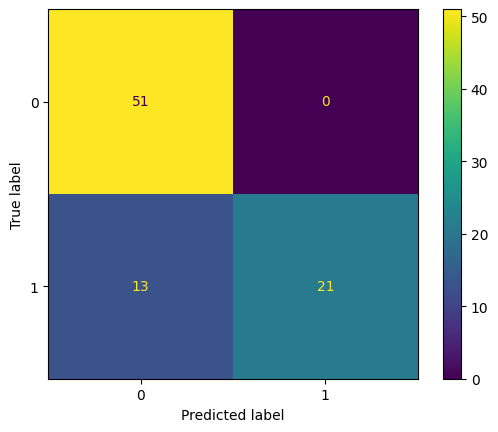

In [388]:
_ = ConfusionMatrixDisplay.from_estimator(landSlideModel, xTest, yTest)

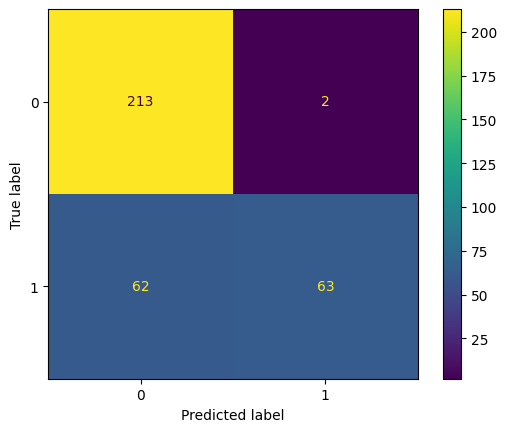

In [390]:
a = ConfusionMatrixDisplay.from_estimator(landSlideModel, xTrain, yTrain)

In [394]:
joblib.dump(landSlideModel, "Land_Slide_Model_Predictor.pkl")

['Land_Slide_Model_Predictor.pkl']